## Importing the file ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("X_train.csv", index_col=[0], header=[0, 1, 2])
X_valid = pd.read_csv("X_valid.csv", index_col=[0], header=[0, 1, 2])
Y_train = pd.read_csv("Y_train.csv", index_col=[0], header=[0])
Y_valid = pd.read_csv("Y_valid.csv", index_col=[0], header=[0])

In [3]:
X_train.head()

LEVEL2               alanine aminotransferase                                \
Aggregation Function                     mask                                 
hours_in                                    0    1    2    3    4    5    6   
3_145834_211552                           1.0  0.0  0.0  0.0  0.0  0.0  0.0   
6_107064_228232                           1.0  0.0  0.0  0.0  0.0  0.0  0.0   
9_150750_220597                           0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11_194540_229441                          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12_112213_232669                          0.0  0.0  0.0  0.0  0.0  0.0  0.0   

LEVEL2                               ... white blood cell count urine         \
Aggregation Function                 ...          time_since_measured          
hours_in                7    8    9  ...                           14     15   
3_145834_211552       0.0  0.0  0.0  ...                          6.0    7.0   
6_107064_228232       0.0  0.0  0.0  ...                         30.0   31.0   
9_150750_220597       0.0  0.0  0.0  ...                         54.0   55.0   
11_194540_229441      0.0  0.0  0.0  ...                         78.0   79.0   
12_112213_232669      0.0  0.0  0.0  ...                        102.0  103.0   

LEVEL2                                                                        
Aggregation Function                                                          
hours_in                 16     17     18     19     20     21     22     23  
3_145834_211552         8.0    9.0   10.0   11.0   12.0   13.0   14.0   15.0  
6_107064_228232        32.0   33.0   34.0   35.0   36.0   37.0   38.0   39.0  
9_150750_220597        56.0   57.0   58.0   59.0   60.0   61.0   62.0   63.0  
11_194540_229441       80.0   81.0   82.0   83.0   84.0   85.0   86.0   87.0  
12_112213_232669      104.0  105.0  106.0  107.0  108.0  109.0  110.0  111.0  

[5 rows x 7488 columns]

## Feature Selection 

#### Extract mean columns ####

In [4]:
Drop_columns=[]
for i in range(len(X_train.columns)):
    if X_train.columns[i][1]=='mask' or X_train.columns[i][1]=='time_since_measured':
        Drop_columns.append(X_train.columns[i])

X_train=X_train.drop(Drop_columns,axis=1)

#### Dropping high-correlated columns ####

In [5]:
#Define a function for dropping high-coorelated columns
def featureSelectByCorr(df_feat,threshold = 0.9):
    corr = df_feat.corr()
    
    cols = np.full((corr.shape[0],), True, dtype = bool)
    for i in range(corr.shape[0],0,-1):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold :
                if(cols[j]):
                    cols[j] = False
    print("Select features by filtering features with high covariance","(>= "+str(threshold)+")",":")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))
    
    return df_feat.iloc[:,cols]




X_corr = featureSelectByCorr(X_train,0.9)





Select features by filtering features with high covariance (>= 0.9) :
Original: 2496 	Selected: 349


#### replcae 0 entry by mean

In [6]:
X_corr_column=list(X_corr.columns)
##replace all the 0 to NaN --> To aviod 0 counted in the mean calculation
X_corr=X_corr.replace(0,np.NaN)

##To chaange all the NaN to their column mean 

#Define a scaler for testing data
training_mean=[]

for i in list(X_corr.columns):
    current_mean=X_corr[i].mean()
    training_mean.append(current_mean)
    X_corr[i]=X_corr[i].replace(np.NaN,current_mean)



X_corr.describe()

LEVEL2               alanine aminotransferase                     albumin  \
Aggregation Function                     mean                        mean   
hours_in                                    0             1             0   
count                            16760.000000  16760.000000  16760.000000   
mean                                -0.141748     -0.141552      0.092290   
std                                  0.419929      0.417218      0.619035   
min                                 -0.279057     -0.279057     -3.131888   
25%                                 -0.248043     -0.248043      0.092290   
50%                                 -0.141748     -0.141552      0.092290   
75%                                 -0.141748     -0.141552      0.092290   
max                                 10.413320     10.413320      3.492301   

LEVEL2               albumin ascites albumin pleural albumin urine  \
Aggregation Function            mean            mean          mean   
hours_in                           0               0             0   
count                   1.676000e+04    16760.000000  1.676000e+04   
mean                    5.921366e-16        0.016125  1.260848e-17   
std                     5.462116e-02        0.051815  5.516467e-02   
min                    -1.702985e+00       -2.312068 -5.691630e-01   
25%                     5.921189e-16        0.016125  1.281027e-17   
50%                     5.921189e-16        0.016125  1.281027e-17   
75%                     5.921189e-16        0.016125  1.281027e-17   
max                     3.469357e+00        1.613770  4.592960e+00   

LEVEL2               alkaline phosphate     anion gap  \
Aggregation Function               mean          mean   
hours_in                              0             0   
count                      16760.000000  16760.000000   
mean                          -0.031857      0.108587   
std                            0.602860      1.016245   
min                           -0.685340     -2.264070   
25%                           -0.214825     -0.572320   
50%                           -0.031857     -0.088963   
75%                           -0.031857      0.636073   
max                           18.543516      8.611466   

LEVEL2               asparate aminotransferase     basophils  ...  \
Aggregation Function                      mean          mean  ...   
hours_in                                     0             0  ...   
count                             16760.000000  16760.000000  ...   
mean                                 -0.129384      0.025980  ...   
std                                   0.482103      0.640235  ...   
min                                  -0.276430     -0.742403  ...   
25%                                  -0.246384      0.025980  ...   
50%                                  -0.129384      0.025980  ...   
75%                                  -0.129384      0.025980  ...   
max                                  15.532207     32.556471  ...   

LEVEL2               tidal volume set tidal volume spontaneous total protein  \
Aggregation Function             mean                     mean          mean   
hours_in                            0                        0             0   
count                    16760.000000             16760.000000  16760.000000   
mean                         0.074958                -0.005224      0.021390   
std                          0.621136                 0.534107      0.090286   
min                         -4.590492                -1.333059     -2.417398   
25%                          0.021368                -0.005224      0.021390   
50%                          0.074958                -0.005224      0.021390   
75%                          0.074958                -0.005224      0.021390   
max                          4.633228                15.454318      3.381777   

LEVEL2               total protein urine    troponin-i    troponin-t  \
Aggregation Function                mean

## Data scaling or manipulation

#### Normalize all the variable

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm=scaler.fit_transform(X_corr)
X_norm=pd.DataFrame(X_norm)


#### Change Y to numpy array

In [8]:
Y_train = pd.read_csv("Y_train.csv", index_col=[0], header=[0])
Y_valid = pd.read_csv("Y_valid.csv", index_col=[0], header=[0])
Y_train = Y_train.iloc[:,0].to_numpy()
Y_train = Y_train.ravel()
Y_valid = Y_valid.iloc[:,0].to_numpy()
Y_valid = Y_valid.ravel()

#### Getting adjusted X_valid according to the work done on X_train

In [9]:
X_valid_corr=X_valid[X_corr.columns]
X_valid_corr=X_valid_corr.replace(0,np.NaN)
operator=0
for i in list(X_valid_corr.columns):
    current_mean=training_mean[operator]
    X_valid_corr[i]=X_valid_corr[i].replace(np.NaN,current_mean)
    operator+=1

X_norm_valid=scaler.transform(X_valid_corr)
X_norm_valid=pd.DataFrame(X_norm_valid)



## Model Construction

In [10]:
from sklearn.metrics import mean_squared_error

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

feature_no=[]
max_depth=[]
est_no=[]
rmse_no=[]



for number in range(1,10):
    best=SelectKBest(f_regression,k=number*30)
    best.fit(X_norm,Y_train)
    X_best=best.transform(X_norm)
    X_best_valid=best.transform(X_norm_valid) 
    for depth in [6,10]:
        for est in [50,100]:
            feature_no.append(number)
            max_depth.append(depth)
            est_no.append(est)
            model = RandomForestRegressor(max_depth= depth, n_estimators= est,random_state=0)
            model.fit(X_best, Y_train)
            Y_pred=model .predict(X_best_valid)
            rmse_no.append(mean_squared_error(Y_valid, Y_pred, squared=False))



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
model= RandomForestRegressor(random_state=0)
model.fit(X_norm, Y_train)
Y_pred=model .predict(X_norm_valid)
print(mean_squared_error(Y_valid, Y_pred, squared=False))

#### Boosted Tree Regressor

xg boost

In [11]:
import xgboost
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression

###learning_rate=0.1,alpha=0.5,random_state=0

feature_no=[]
rate_no=[]
alpha_no=[]
rmse_no=[]
max_depth=[]


for number in range(1,10):
    best=SelectKBest(f_regression,k=number*30)
    best.fit(X_norm,Y_train)
    X_best=best.transform(X_norm)
    X_best_valid=best.transform(X_norm_valid) 
    for rate in [0.01,0.1,1]:
        for alp in [0.01,0.1,0.5]:
            for max in [3,6,8]:
                feature_no.append(number)
                rate_no.append(rate)
                alpha_no.append(alp)
                max_depth.append(max)
                model = XGBRegressor(learning_rate=rate,alpha=alp,max_depth=max,random_state=0)
                model.fit(X_best, Y_train)
                Y_pred=model .predict(X_best_valid)
                rmse_no.append(mean_squared_error(Y_valid, Y_pred, squared=False))

    




<Figure size 640x480 with 0 Axes>

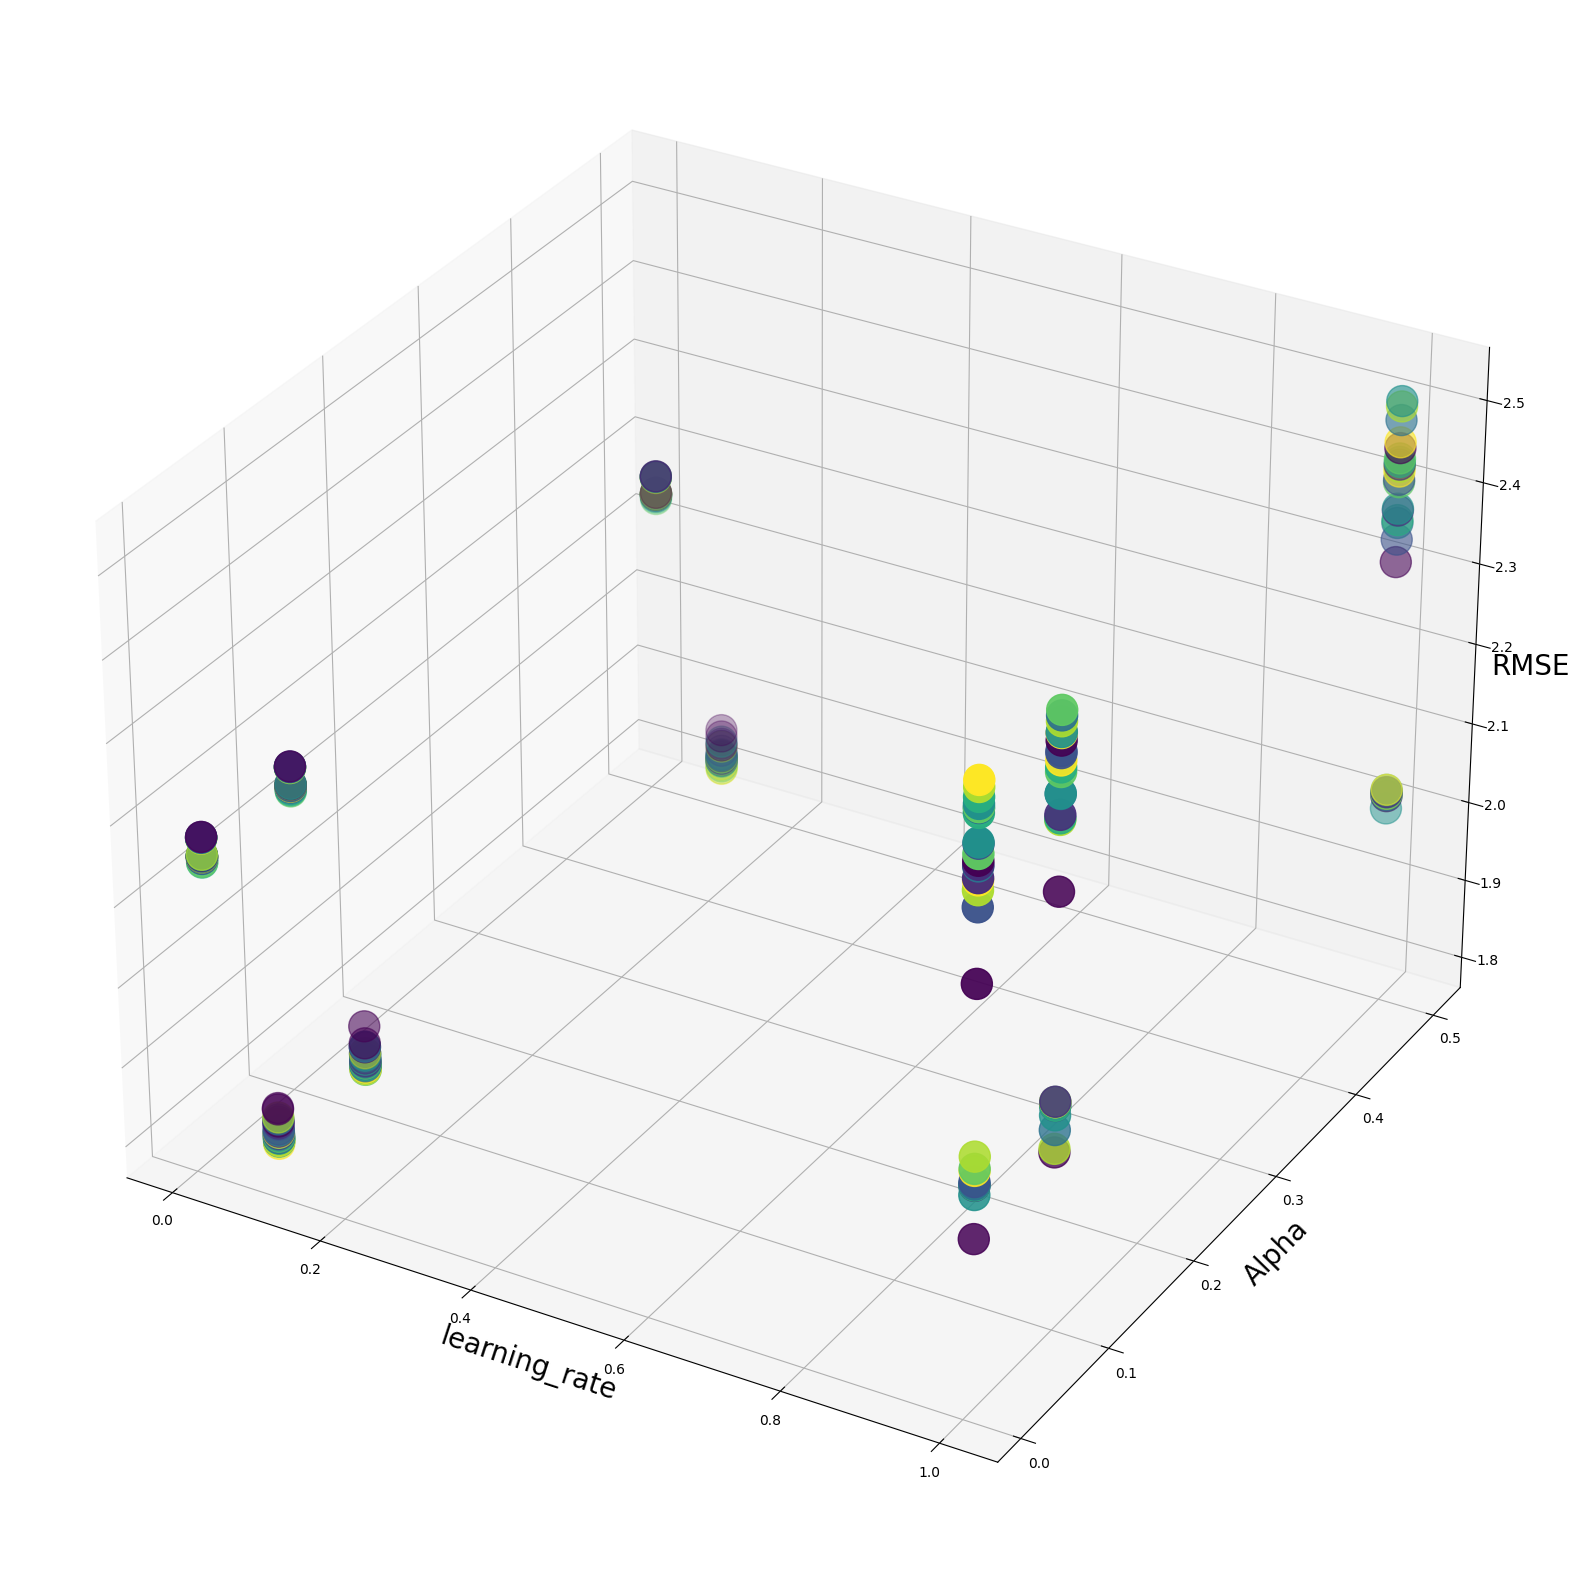

In [24]:
for i in feature_no:
    i=i*100
fig = plt.figure()
plt.figure(figsize=(20,30)) 
ax = plt.axes(projection='3d')
ax.scatter3D(rate_no, alpha_no,rmse_no,c=feature_no,s=500)
ax.set_xlabel('learning_rate', fontsize=20)
ax.set_ylabel('Alpha', fontsize=20)
ax.set_zlabel('RMSE', fontsize=20)

plt.show()


### Best Model

In [25]:
##Best Model
best=SelectKBest(f_regression,k=300)
best.fit(X_norm,Y_train)
X_best=best.transform(X_norm)
X_best_valid=best.transform(X_norm_valid) 
model = XGBRegressor(learning_rate=0.1,alpha=0.5,random_state=0)
model.fit(X_best, Y_train)
Y_pred=model .predict(X_best_valid)
print(mean_squared_error(Y_valid, Y_pred, squared=False))



1.8191907604353112
